## Evaluating complete dataset (March 2020 - December 2020/Jan 1 2021)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import seaborn as sns
from math import sqrt

transformar_features = False
data = pd.read_csv('./data_input_zerofill.csv', sep=';', delimiter=';')
# busline_filter = 41
# data_model = data.loc[data['linha'] == busline_filter]
# display(data_model)

In [7]:
print('Quantidade de Linhas de Onibus: ', len(data.linha.unique()))
# data

Quantidade de Linhas de Onibus:  404


## Sazonalidade Anual / Dia

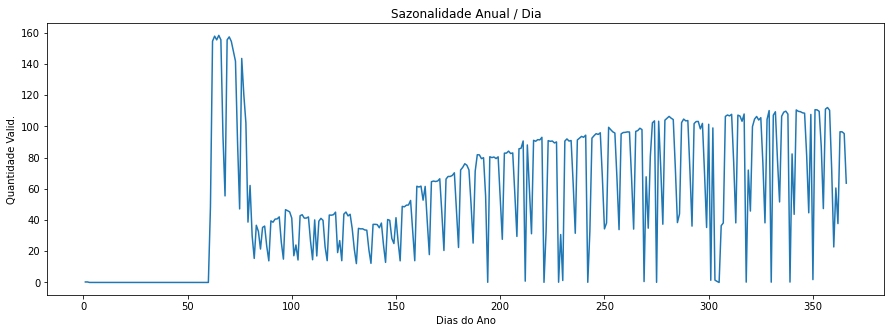

In [8]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Ano')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Anual / Dia")
sns.lineplot(x="d_ano", y="validations_per_hour", data=data, markers=True, dashes=False, ci=None)
#plt.plot(data['d_ano'], data['validations_per_hour'], 'b--')
plt.show()

## Relacao QTD de validacoes Mensais

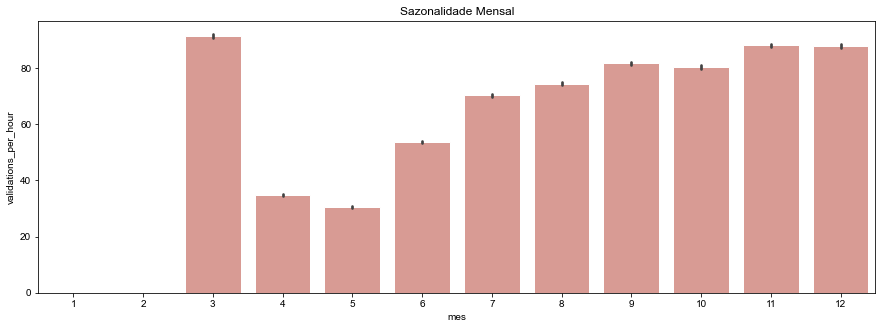

In [9]:
plt.figure(figsize=(15,5))
plt.xlabel('Meses')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Mensal")
sns.set_theme(style="whitegrid")
sns.barplot(x="mes", y="validations_per_hour", data=data, color='salmon', saturation=.5)
#plt.plot(data['mes'], data['validations_per_hour'], kind='bar')
plt.show()

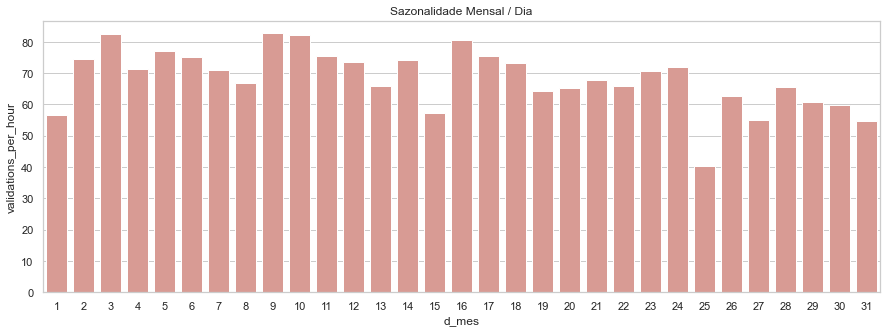

In [10]:

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Mensal / Dia")
sns.barplot(x="d_mes", y="validations_per_hour", data=data, color="salmon", saturation=.5, ci=None)
#plt.plot(data['d_mes'], data['validations_per_hour'], 'b--')
plt.show()

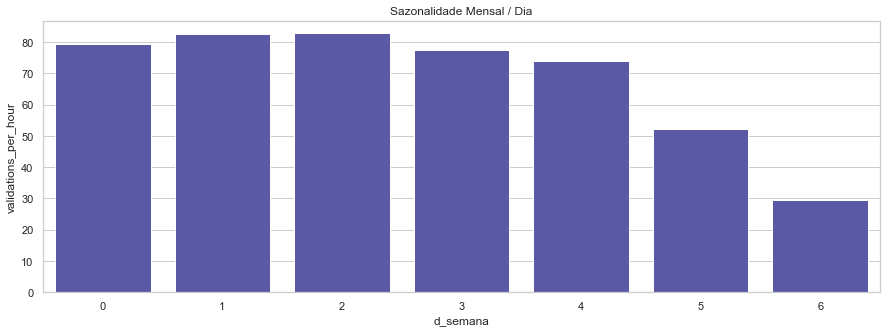

In [11]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Mensal / Dia")
sns.barplot(x='d_semana', y='validations_per_hour', data=data, color="blue", saturation=.3, ci=None)
plt.show()

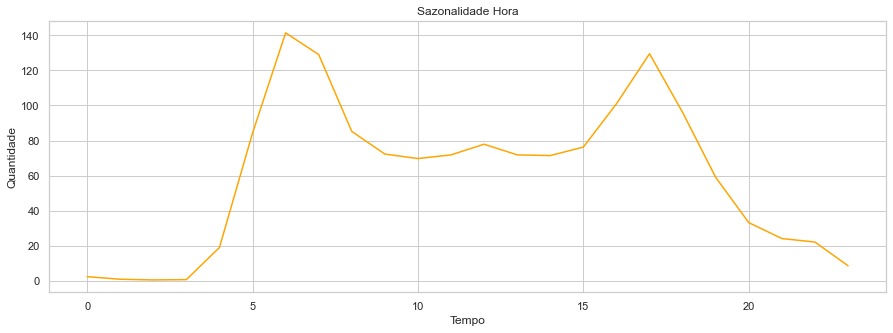

In [12]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data, ci=None, color='orange')
plt.show()

## Visualizacao das Linhas

### Ranking (top 10 / 100)
Ranking feito atraves do comparativo entre os 
modelos mais performaticos analisados: (exemplo abaixo feito sob a linha 41)  
- Stacking Regressors  
- RandomForest GridSearched  
- RandomForest Default  
- RandomForest Bagging  
- GradientBoostingRegressor  
- LinearRegression Bagging  
- LinearReg GridSearched  
- LinearReg Default  

In [21]:
performance_modelos = pd.read_csv('./performances/performance_total_linha41.csv').sort_values('MAE', ascending=True)
performance_modelos

,R2,RMSE,MAE
1,0.944499,64.668479,29.054552
7,0.933350,70.867011,31.550221
5,0.931256,71.971289,31.868211
3,0.931362,71.916015,33.229468
0,0.949120,61.918133,34.693086
2,0.434606,206.404193,146.928550
6,0.435941,206.160301,147.396588
4,0.435941,206.160301,147.396588


In [17]:
data = pd.read_csv('./performances/ranking_top100.csv', sep=',', delimiter=',')
ranking = data.sort_values('MAE', ascending=True).drop_duplicates(subset=['Linha'])
ranking.head(10)

,Linha,R2,RMSE,MAE
0,325,0.855805,6.237197,3.708476
3,384,0.876705,6.257836,3.903380
8,332,0.819357,7.037291,4.299338
12,619,0.831069,6.610710,4.441423
16,641,0.804414,7.701158,4.666211
20,630,0.902611,8.925873,5.000876
21,304,0.872795,8.485959,5.060620
26,339,0.845717,8.890747,5.270951
28,225,0.847308,10.315144,5.313097
35,356,0.900404,9.234865,5.510715
